In [2]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Import the april dataset
april=pd.read_csv('/Users/ildem/Desktop/Project_8/uber.csv')

In [4]:
# Explore the dataset
april.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [5]:
april.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [6]:
april['Base'].value_counts()

B02682    227808
B02598    183263
B02617    108001
B02512     35536
B02764      9908
Name: Base, dtype: int64

In [7]:
# Change the type of data/time column to datetime from object
april['datetime']=pd.to_datetime(april['Date/Time'])

In [8]:
# Create weekday and hour columns and drop datetime

april['hour']=april.datetime.dt.hour
april['weekday']=april.datetime.dt.day_name()

april.drop(['Date/Time', 'datetime'], axis=1, inplace=True)

In [9]:
april

,Lat,Lon,Base,hour,weekday
0,40.7690,-73.9549,B02512,0,Tuesday
1,40.7267,-74.0345,B02512,0,Tuesday
2,40.7316,-73.9873,B02512,0,Tuesday
3,40.7588,-73.9776,B02512,0,Tuesday
4,40.7594,-73.9722,B02512,0,Tuesday
...,...,...,...,...,...
564511,40.7640,-73.9744,B02764,23,Wednesday
564512,40.7629,-73.9672,B02764,23,Wednesday
564513,40.7443,-73.9889,B02764,23,Wednesday
564514,40.6756,-73.9405,B02764,23,Wednesday


In [10]:
april.weekday.value_counts()

Wednesday    108631
Tuesday       91185
Friday        90303
Thursday      85067
Saturday      77218
Monday        60861
Sunday        51251
Name: weekday, dtype: int64

In [26]:
Sat=april[['hour']][april['weekday']=='Saturday']

In [27]:
Sun=april[['hour']][april['weekday']=='Sunday']

In [28]:
weekend=pd.merge(Sat, Sun)

Text(0.5, 1.0, 'Saturday')

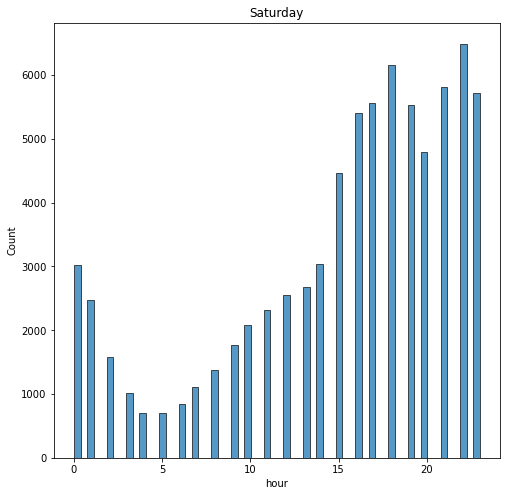

In [22]:
plt.figure(figsize=(8, 8))
sns.histplot(Sat.hour)
plt.title('Saturday')

Text(0.5, 1.0, 'Sunday')

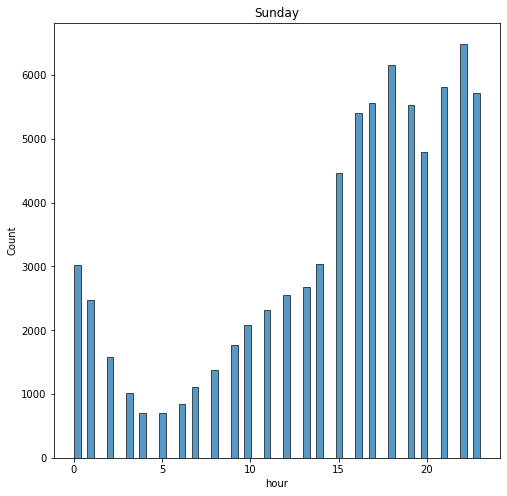

In [53]:
plt.figure(figsize=(8, 8))
sns.histplot(Sat.hour)
plt.title('Sunday')

In [31]:
april['time_of_day']=april['hour']

In [32]:
april.head()

,Lat,Lon,Base,hour,weekday,time_of_day
0,40.7690,-73.9549,B02512,0,Tuesday,0
1,40.7267,-74.0345,B02512,0,Tuesday,0
2,40.7316,-73.9873,B02512,0,Tuesday,0
3,40.7588,-73.9776,B02512,0,Tuesday,0
4,40.7594,-73.9722,B02512,0,Tuesday,0


In [33]:
april['time_of_day']=np.where((april.hour>=0) & (april.hour<6), "night", april['time_of_day'])

In [34]:
april['time_of_day']=np.where((april.hour>=6) & (april.hour<12), "morning", april['time_of_day'])

In [35]:
april['time_of_day']=np.where((april.hour>=12) & (april.hour<18), "afternoon", april['time_of_day'])

In [36]:
april['time_of_day']=np.where((april.hour>=18), "evening", april['time_of_day'])

In [37]:
april['time_of_day'].value_counts()

evening      206428
afternoon    192020
morning      120843
night         45225
Name: time_of_day, dtype: int64

In [44]:
april['time_of_day'] = pd.Categorical(april['time_of_day'], ['morning','afternoon','evening','night'])

In [45]:
april['weekday']=pd.Categorical(april['weekday'], ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday',
                                                  'Sunday'])

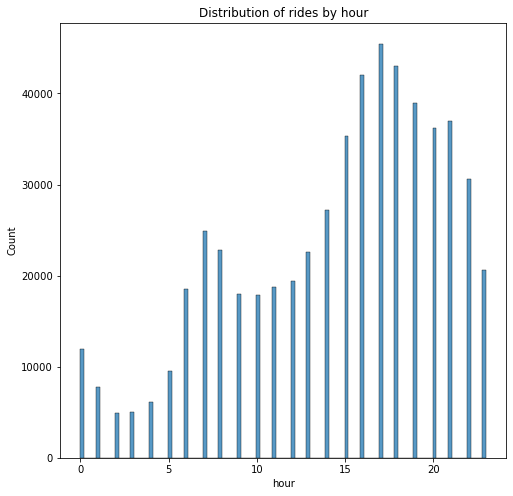

In [58]:
plt.figure(figsize=(8, 8))
sns.histplot(data=april, x='hour', palette='viridis')
plt.title('Distribution of rides by hour')
plt.savefig('distribution_hour')

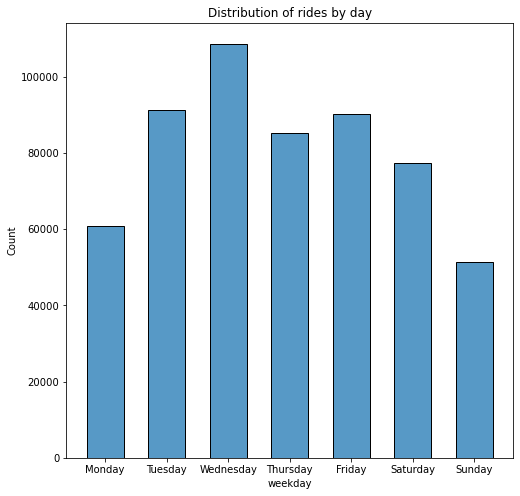

In [57]:
plt.figure(figsize=(8, 8))
sns.histplot(data=april, x='weekday', palette='viridis', shrink=0.6)
plt.title('Distribution of rides by day')
plt.savefig('distribution_day')

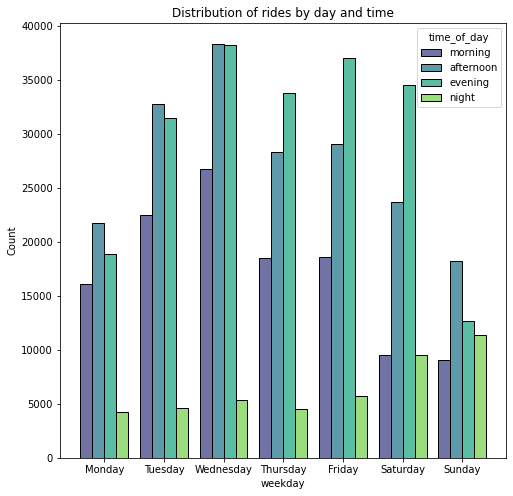

In [56]:
plt.figure(figsize=(8, 8))
sns.histplot(data=april, x='weekday', hue='time_of_day', multiple='dodge', shrink=0.8, palette='viridis')
plt.title('Distribution of rides by day and time')
plt.savefig('distribution_day_time')

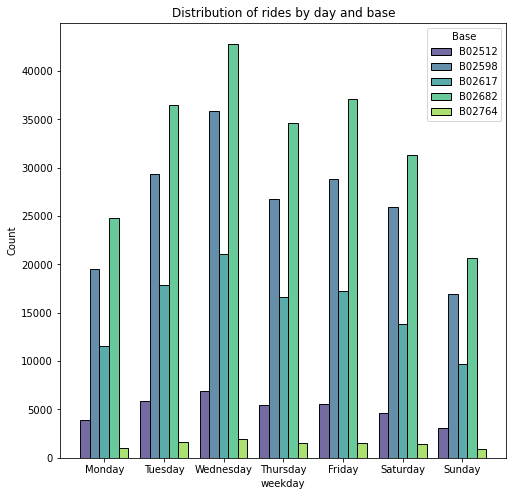

In [55]:
plt.figure(figsize=(8, 8))
sns.histplot(data=april, x='weekday', hue='Base', multiple='dodge', shrink=0.8, palette='viridis')
plt.title('Distribution of rides by day and base')
plt.savefig('distribution_day_base')

In [ ]:
# Encode the Base and weekday columns
#april['Base']=LabelEncoder().fit_transform(april['Base'])

#april['weekday']=LabelEncoder().fit_transform(april['weekday'])

In [ ]:
# Sampling 
#april_s10=april.sample(frac=0.10)

#april_s10.to_csv('/Users/ildem/Desktop/Project_8/april_10.csv')